In [249]:
import numpy as np
import pandas as pd
import os
import json

import imageio
import geopandas
from shapely.geometry import Point, Polygon, box
from scipy.stats import wasserstein_distance
import higra as hg

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

# Find thresholds for brownness and cloudiness to transfer France model

## Histograms of France imagery

In [11]:
base_dir = '../data/planet/france/sherrie10k/monthly_mosaics_renamed_clipped_merged/1250px/4x_downsample/'
oct_dir = os.path.join(base_dir, '2019_10/')
jul_dir = os.path.join(base_dir, '2019_07/')
apr_dir = os.path.join(base_dir, '2019_04/')
image_names = [str(x).zfill(5) for x in np.arange(10000)]
n_samples = 1000
random_image_names = np.random.choice(image_names, n_samples, replace=False)

random_images = np.zeros((n_samples*3, 256, 256, 3))
for i, img_name in enumerate(random_image_names):
    random_images[i*3] = imageio.imread(os.path.join(apr_dir, img_name+'_2019_04.tif'))
    random_images[i*3+1] = imageio.imread(os.path.join(jul_dir, img_name+'_2019_07.tif'))
    random_images[i*3+2] = imageio.imread(os.path.join(oct_dir, img_name+'_2019_10.tif'))

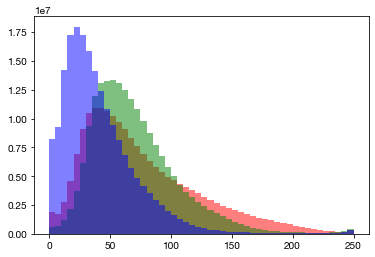

In [12]:
plt.hist(random_images[:,:,:,0].flatten(), bins=np.arange(0, 255, 5), color='red', alpha=0.5)
plt.hist(random_images[:,:,:,1].flatten(), bins=np.arange(0, 255, 5), color='green', alpha=0.5)
plt.hist(random_images[:,:,:,2].flatten(), bins=np.arange(0, 255, 5), color='blue', alpha=0.5)
plt.show()

In [20]:
red_hist, bins = np.histogram(random_images[:,:,:,0].flatten(), bins=np.arange(0, 260, 5))
green_hist, _ = np.histogram(random_images[:,:,:,1].flatten(), bins=np.arange(0, 260, 5))
blue_hist, _ = np.histogram(random_images[:,:,:,2].flatten(), bins=np.arange(0, 260, 5))

array([ 1871205,  1707414,  2789669,  4592406,  6926642,  9104030,
       10470687, 10898597, 10879191, 10634886, 10215398,  9701853,
        9052363,  8341022,  7607711,  6895680,  6283332,  5766780,
        5323633,  4960321,  4642721,  4354481,  4071020,  3788666,
        3501668,  3221452,  2945593,  2686966,  2449166,  2235795,
        2038822,  1853230,  1687143,  1543632,  1412473,  1288805,
        1173246,  1059151,   942306,   828361,   715948,   605145,
         505023,   411804,   330748,   265551,   216471,   180290,
         161668,   241239,  1226596])

In [23]:
red_hist = red_hist / 3000 / 256
green_hist = green_hist / 3000 / 256
blue_hist = blue_hist / 3000 / 256

In [71]:
hist_array = np.array([red_hist, green_hist, blue_hist])
np.save('../data/planet/france/sherrie10k/RGB_histogram.npy', hist_array)

In [26]:
# get distribution of wasserstein distance (earth mover's distance) across 
# more random France images
n_samples = 1000
random_image_names2 = np.random.choice(image_names, n_samples, replace=False)

random_images2 = np.zeros((n_samples*3, 256, 256, 3))
for i, img_name in enumerate(random_image_names2):
    random_images2[i*3] = imageio.imread(os.path.join(apr_dir, img_name+'_2019_04.tif'))
    random_images2[i*3+1] = imageio.imread(os.path.join(jul_dir, img_name+'_2019_07.tif'))
    random_images2[i*3+2] = imageio.imread(os.path.join(oct_dir, img_name+'_2019_10.tif'))

wasserstein_distances = []
for i in range(random_images2.shape[0]):
    red_dist = wasserstein_distance(red_hist, random_images2[i,:,:,0].flatten())
    green_dist = wasserstein_distance(green_hist, random_images2[i,:,:,1].flatten())
    blue_dist = wasserstein_distance(blue_hist, random_images2[i,:,:,2].flatten())
    total_dist = red_dist + green_dist + blue_dist
    wasserstein_distances.append(total_dist)

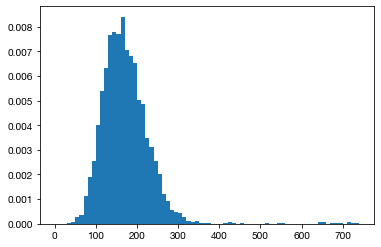

In [54]:
plt.hist(wasserstein_distances, bins=np.arange(0,750,10), density=True)
plt.show()

## Histograms of India imagery

In [51]:
base_dir = '../data/planet/india/monthly_mosaics_renamed_clipped_merged/'
month_dirs = ['2019_{}'.format(str(x+1).zfill(2)) for x in range(12)]
image_names = [str(x).zfill(5) for x in np.arange(1000) if x not in (652, 278, 904)]
image_names 
n_samples = 250
random_image_names = np.random.choice(image_names, n_samples, replace=False)

random_images = np.zeros((n_samples, len(month_dirs), 256, 256, 3))
for i, img_name in enumerate(random_image_names):
    for month in range(len(month_dirs)):
        random_images[i, month] = imageio.imread(os.path.join(
            base_dir, month_dirs[month], img_name+'_2019_{}.tif'.format(str(month+1).zfill(2))))[:256,:256,:3]

In [40]:
# not sure why, but some planet images weren't downloaded (tried again and still not downloaded)
# aug_india = sorted(os.listdir('/home/swang222/GitHub/field_segmentation/data/planet/india/monthly_mosaics_renamed_clipped_merged/2019_08'))
# for x in range(1000):
#     img_name = '{}_2019_08.tif'.format(str(x).zfill(5))
#     if img_name not in aug_india:
#         print(img_name)

00278_2019_08.tif
00904_2019_08.tif


In [52]:
random_images.shape

(250, 12, 256, 256, 3)

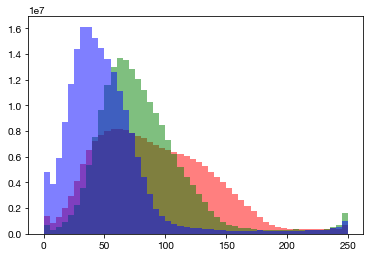

In [49]:
plt.hist(random_images[:,:,:,:,0].flatten(), bins=np.arange(0, 255, 5), color='red', alpha=0.5)
plt.hist(random_images[:,:,:,:,1].flatten(), bins=np.arange(0, 255, 5), color='green', alpha=0.5)
plt.hist(random_images[:,:,:,:,2].flatten(), bins=np.arange(0, 255, 5), color='blue', alpha=0.5)
plt.show()

In [55]:
# get distribution of wasserstein distance (earth mover's distance) across 
# random India images
wasserstein_distances_india = np.zeros((n_samples, len(month_dirs)))
for i in range(n_samples):
    for month in range(len(month_dirs)):
        red_dist = wasserstein_distance(red_hist, random_images[i,month,:,:,0].flatten())
        green_dist = wasserstein_distance(green_hist, random_images[i,month,:,:,1].flatten())
        blue_dist = wasserstein_distance(blue_hist, random_images[i,month,:,2].flatten())
        total_dist = red_dist + green_dist + blue_dist
        wasserstein_distances_india[i, month] = total_dist

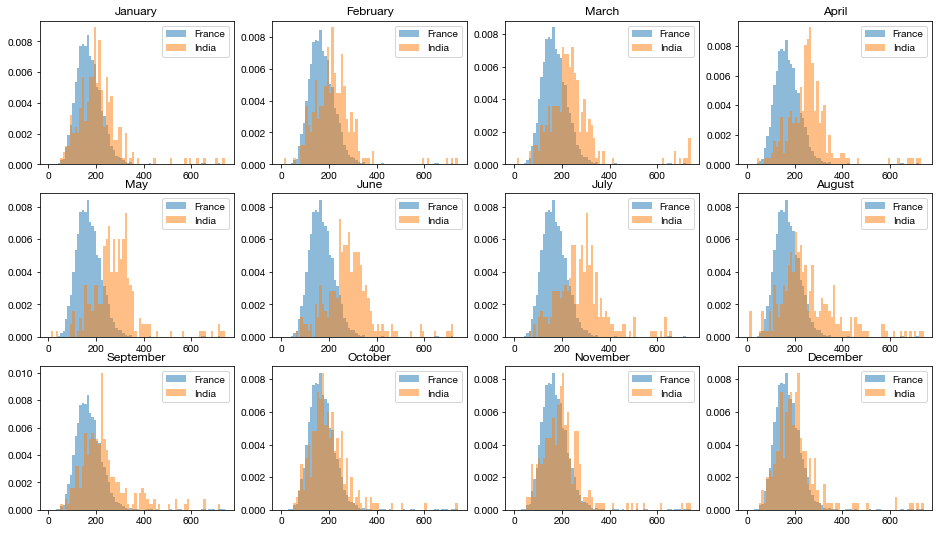

In [65]:
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
              7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
ncols = 4
fig, ax = plt.subplots(3, ncols, figsize=(16, 9))
bins = np.arange(0,750,10)
for month in range(len(month_dirs)):
    i = month // ncols
    j = month % ncols
    ax[i,j].hist(wasserstein_distances, bins=bins, density=True, alpha=0.5)
    ax[i,j].hist(wasserstein_distances_india[:,month], bins=bins, density=True, alpha=0.5)
    ax[i,j].set_title('{}'.format(month_dict[month+1]))
    ax[i,j].legend(['France', 'India'])
plt.show()

## Find Wasserstein distance threshold

In [2]:
france_rgb_hist = np.load('../data/planet/france/sherrie10k/RGB_histogram.npy')

In [6]:
random_image.shape

(325, 325, 4)

In [8]:
red_hist

array([ 2.43646484,  2.22319531,  3.63238151,  5.97969531,  9.0190651 ,
       11.85420573, 13.63370703, 14.19088151, 14.16561328, 13.84750781,
       13.30129948, 12.63262109, 11.78693099, 10.86070573,  9.9058737 ,
        8.97875   ,  8.18142187,  7.50882812,  6.9318138 ,  6.4587513 ,
        6.04520964,  5.66989714,  5.30080729,  4.93315885,  4.55946354,
        4.19459896,  3.83540755,  3.49865365,  3.18901823,  2.91119141,
        2.65471615,  2.4130599 ,  2.19680078,  2.0099375 ,  1.83915755,
        1.67813151,  1.52766406,  1.37910286,  1.22696094,  1.07859505,
        0.93222396,  0.78794922,  0.65758203,  0.53620313,  0.43066146,
        0.34576953,  0.28186328,  0.2347526 ,  0.21050521,  0.31411328,
        1.59713021])

In [13]:
def InstSegm(extent, boundary, t_ext=0.4, t_bound=0.2):
    """
    INPUTS:
    extent : extent prediction
    boundary : boundary prediction
    t_ext : threshold for extent
    t_bound : threshold for boundary
    OUTPUT:
    instances
    """

    # Threshold extent mask
    ext_binary = np.uint8(extent >= t_ext)

    # Artificially create strong boundaries for
    # pixels with non-field labels
    input_hws = np.copy(boundary)
    input_hws[ext_binary == 0] = 1

    # Create the directed graph
    size = input_hws.shape[:2]
    graph = hg.get_8_adjacency_graph(size)
    edge_weights = hg.weight_graph(
        graph,
        input_hws,
        hg.WeightFunction.mean
    )

    tree, altitudes = hg.watershed_hierarchy_by_dynamics(
        graph,
        edge_weights
    )
    
    # Get individual fields
    # by cutting the graph using altitude
    instances = hg.labelisation_horizontal_cut_from_threshold(
        tree,
        altitudes,
        threshold=t_bound)
    
    instances[ext_binary == 0] = -1

    return instances

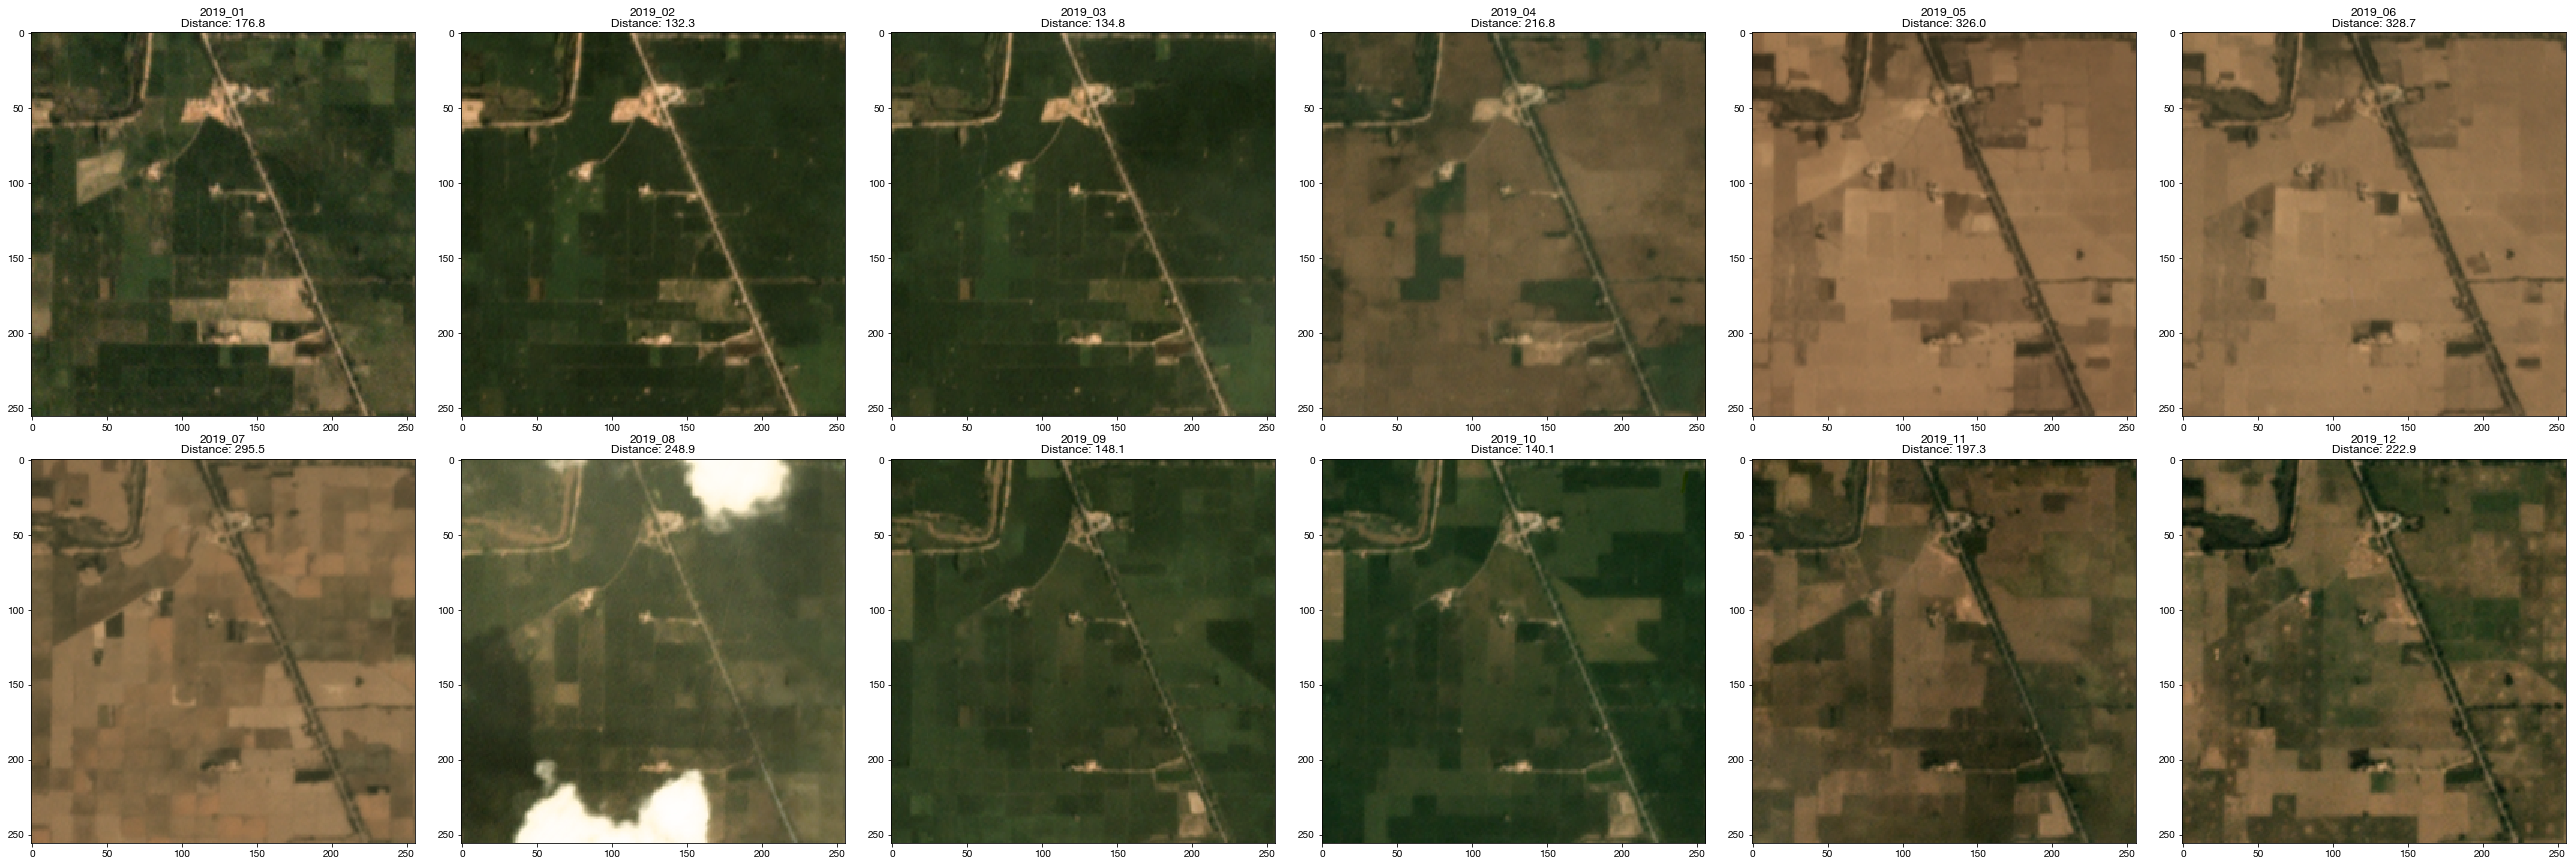

In [271]:
red_hist = france_rgb_hist[0]
green_hist = france_rgb_hist[1]
blue_hist = france_rgb_hist[2]

image_names = [str(x).zfill(5) for x in np.arange(1000) if x not in (652, 278, 904)]
# random_image_name = np.random.choice(image_names)
random_image_name = '00126'
img_dir = '../data/planet/india/monthly_mosaics_renamed_clipped_merged/'
month_dirs = ['2019_{}'.format(str(x+1).zfill(2)) for x in range(12)]

fig, ax = plt.subplots(2, 6, figsize=(36, 12))
for m, month in enumerate(month_dirs):
    random_image = imageio.imread(os.path.join(img_dir, month, random_image_name + '_' + month + '.tif'))[:256,:256,:3]
    red_dist = wasserstein_distance(red_hist, random_image[:,:,0].flatten())
    green_dist = wasserstein_distance(green_hist, random_image[:,:,1].flatten())
    blue_dist = wasserstein_distance(blue_hist, random_image[:,2].flatten())
    total_distance = red_dist + green_dist + blue_dist
    
    i = m // 6
    j = m % 6
    ax[i,j].imshow(random_image)
    ax[i,j].set_title('{}\nDistance: {:0.1f}'.format(month, total_distance))
    
plt.tight_layout()
plt.show()

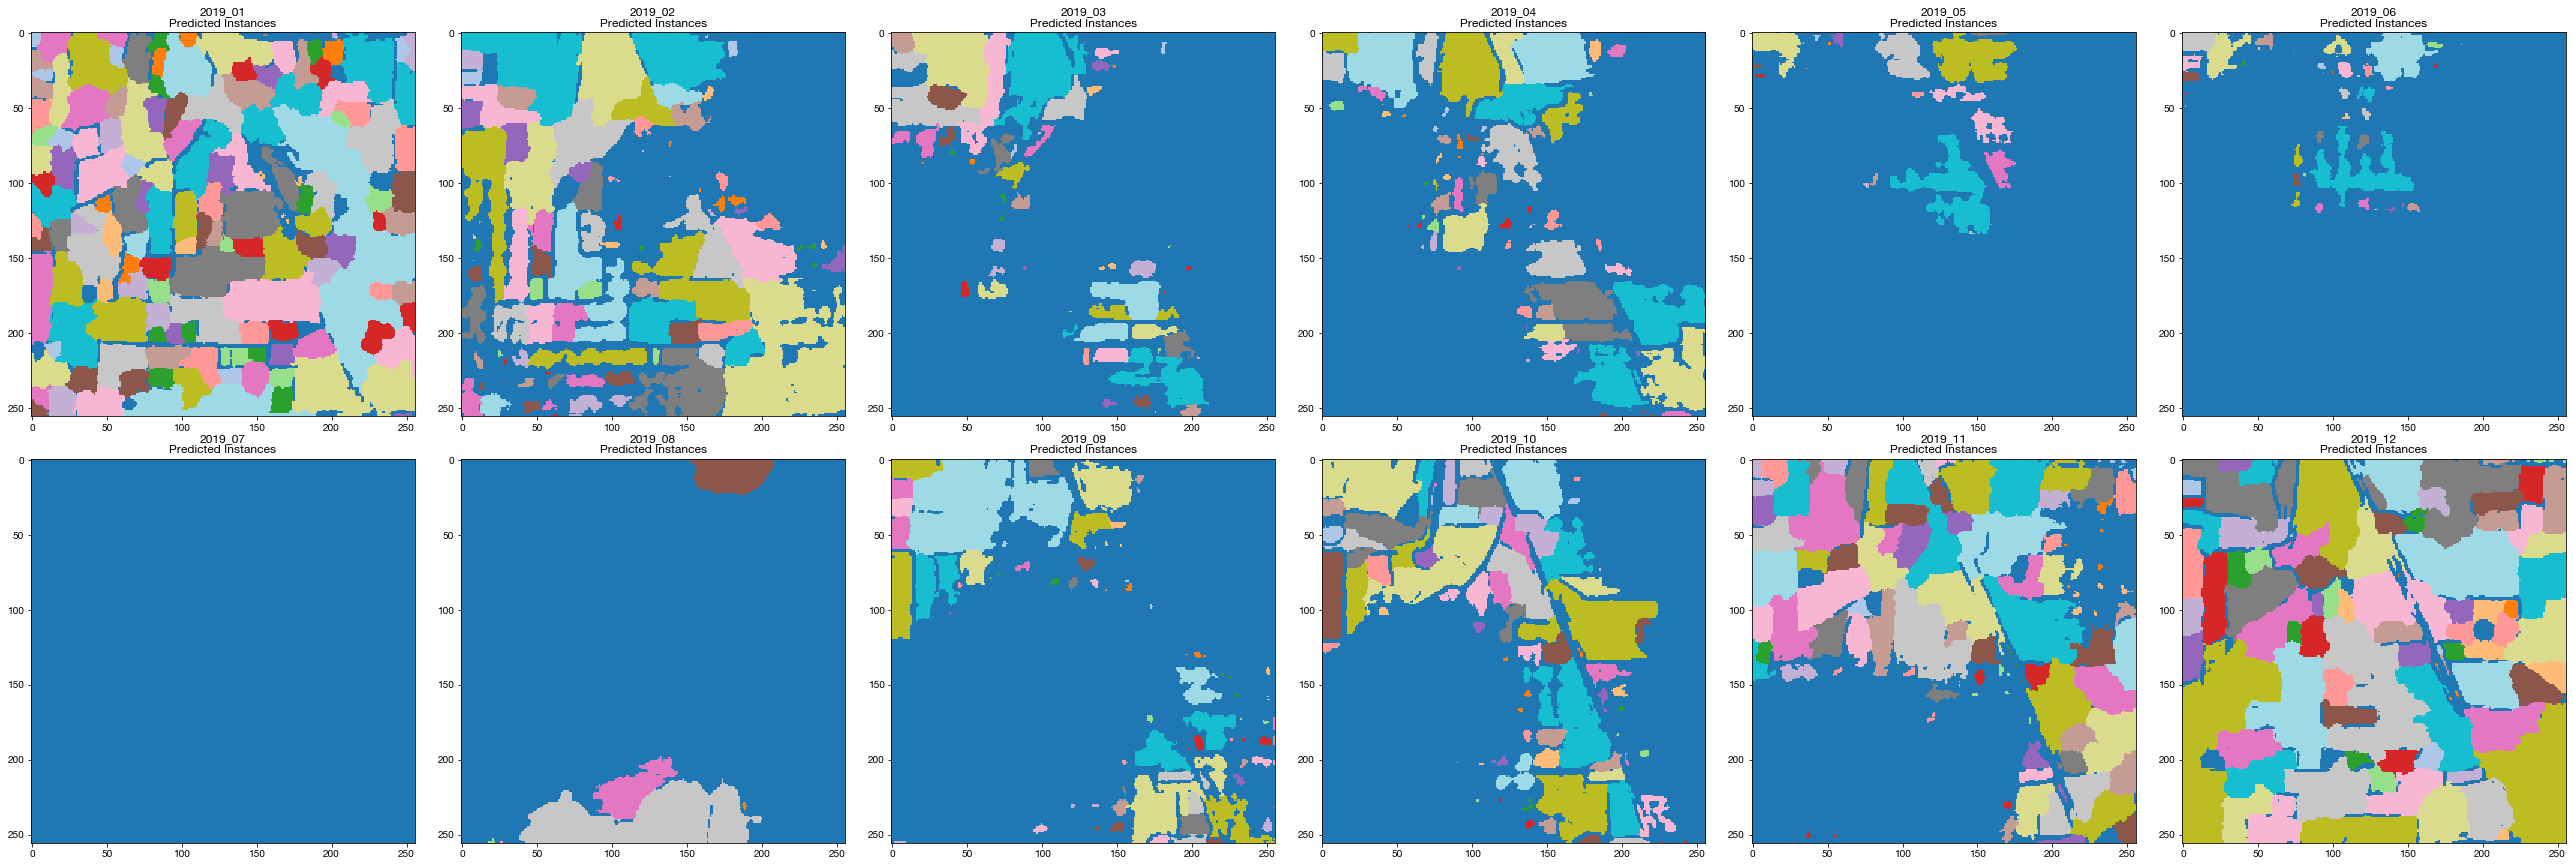

In [272]:
model_name = 'resunet-d6_aprJulOctSeparate_class-notreeexceptvines_nfilter-16_bs-8_lr-0.001_4x-downsampled/'
results_dir = '../results/india/{}/planet/'.format(model_name)
t_ext = 0.5
t_bound = 0.1

fig, ax = plt.subplots(2, 6, figsize=(36,12))
for m, month in enumerate(month_dirs):
#     example_img = imageio.imread(os.path.join(image_dir, month, '{}_{}.tif'.format(image_id, month)))[:256,:256,:3]
    example_extent = np.load(os.path.join(results_dir, month, 'extent_predictions/{}.npy'.format(random_image_name)))
    example_boundary = np.load(os.path.join(results_dir, month, 'boundary_predictions/{}.npy'.format(random_image_name)))
    
    instances = InstSegm(example_extent, example_boundary, t_ext=t_ext, t_bound=t_bound)

    # map instances to better range for plotting
    unique_instances = sorted(np.unique(instances))
    n_instances = len(unique_instances)
    instance_map = {x: i for i, x in enumerate(unique_instances)}
    def map_values(x):
        return instance_map[x]
    instances_mapped = np.array(list(map(map_values, instances.flatten()))).reshape( 
        instances.shape[0], instances.shape[1])
    
    i = m // 6
    j = m % 6
    ax[i,j].imshow(instances_mapped, vmin=0, vmax=n_instances+1, cmap='tab20')
    ax[i,j].set_title('{}\nPredicted Instances'.format(month, total_distance))

plt.tight_layout()
plt.show()

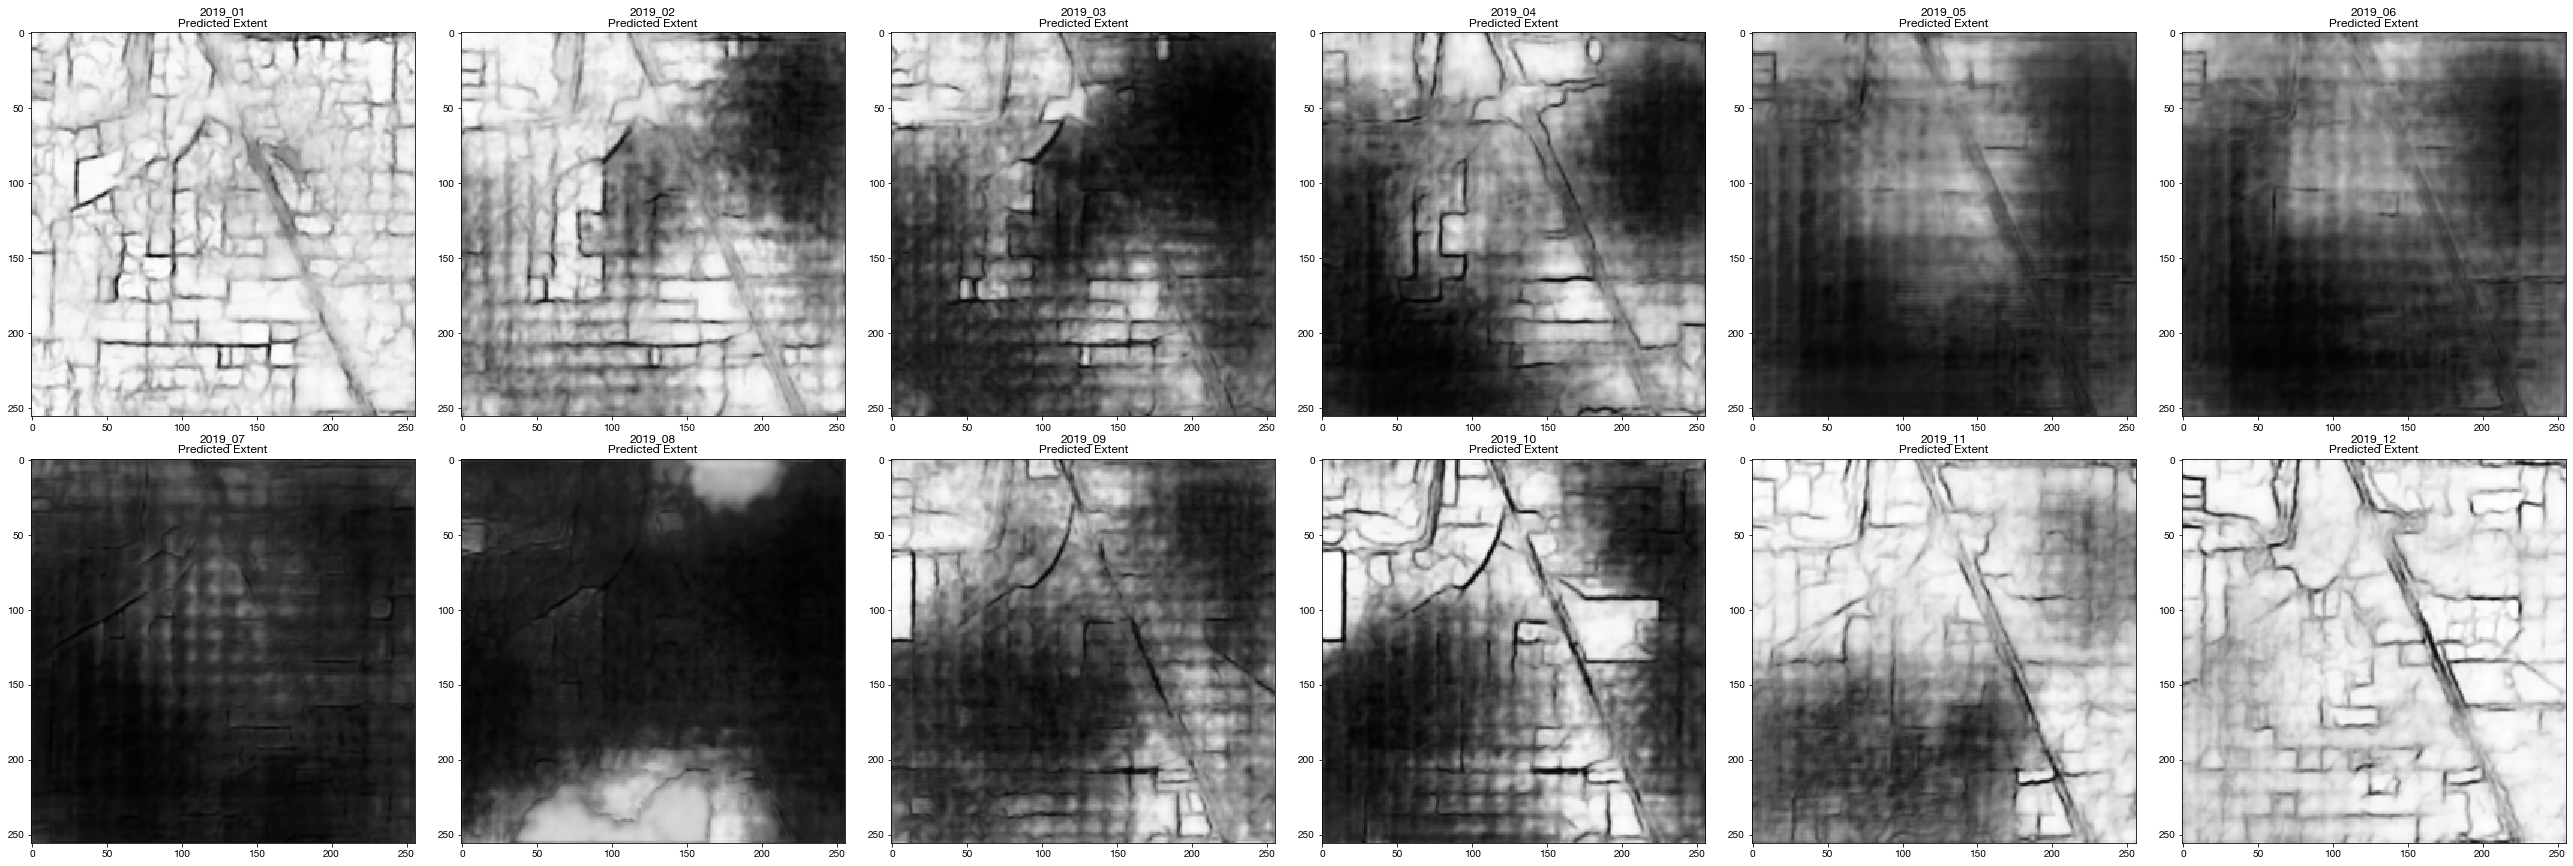

In [275]:
model_name = 'resunet-d6_aprJulOctSeparate_class-notreeexceptvines_nfilter-16_bs-8_lr-0.001_4x-downsampled/'
results_dir = '../results/india/{}/planet/'.format(model_name)
t_ext = 0.5
t_bound = 0.1

fig, ax = plt.subplots(2, 6, figsize=(36,12))
for m, month in enumerate(month_dirs):
    example_extent = np.load(os.path.join(results_dir, month, 'extent_predictions/{}.npy'.format(random_image_name)))
    example_boundary = np.load(os.path.join(results_dir, month, 'boundary_predictions/{}.npy'.format(random_image_name)))
    
    i = m // 6
    j = m % 6
    ax[i,j].imshow(example_extent, vmin=0, vmax=1, cmap='Greys_r')
    ax[i,j].set_title('{}\nPredicted Extent'.format(month))

plt.tight_layout()
plt.show()

In [276]:
from sklearn.metrics import matthews_corrcoef

truth = imageio.imread('../data/planet/india/extent_labels/00064.png')[:256,:256]
mccs = []
for m, month in enumerate(month_dirs):
    example_extent = np.load(os.path.join(results_dir, month, 'extent_predictions/{}.npy'.format(random_image_name)))
    mcc = matthews_corrcoef(truth.flatten(), example_extent.flatten() > 0.5)
    print(mcc)
    mccs.append(mcc)
print("Mean MCC:", np.mean(mccs))
print("Max MCC:", np.max(mccs))

0.011742643909433229
-0.09961431070911217
-0.07155872506055712
-0.026744269820819507
0.009522843233825956
-0.02486404580670453
0.0
-0.06009471005923972
-0.07610952184040302
-0.03315429094714554
0.020288449010221
0.021905885000237286
Mean MCC: -0.027390004424188683
Max MCC: 0.021905885000237286


## Find 30-100 images to hand label

In [129]:
img_name

'00029_2019_02.tif'

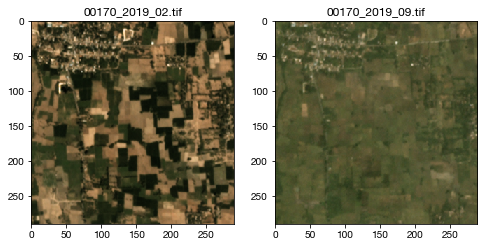

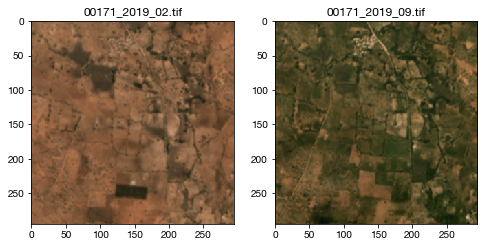

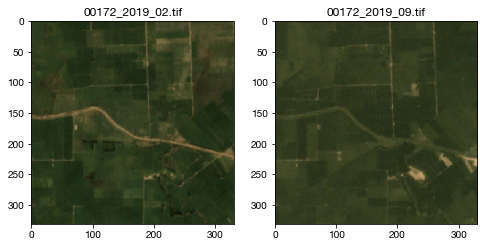

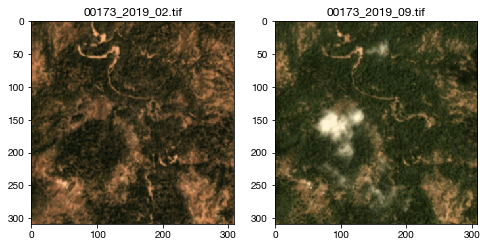

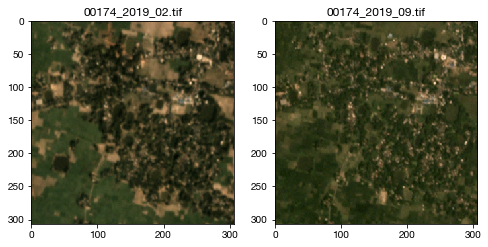

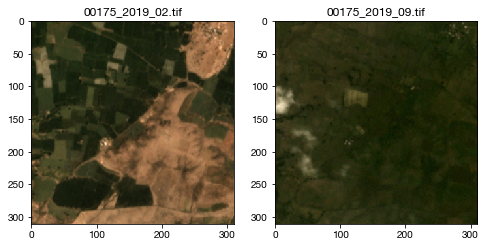

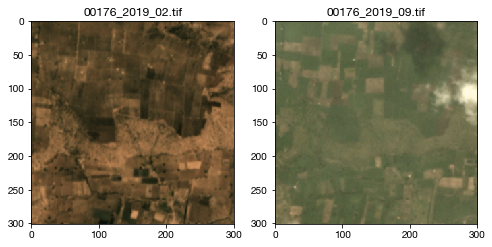

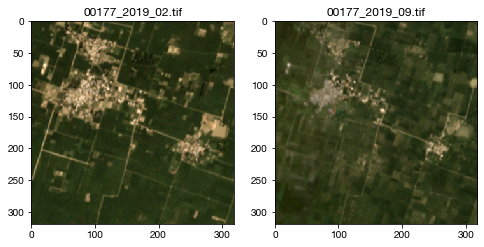

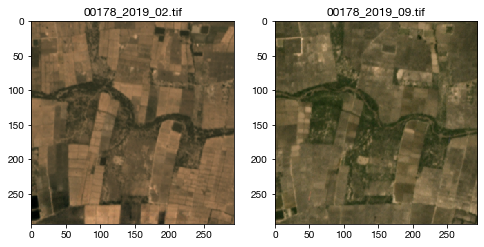

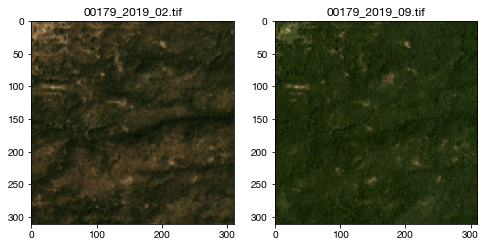

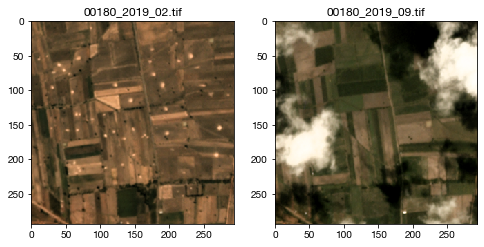

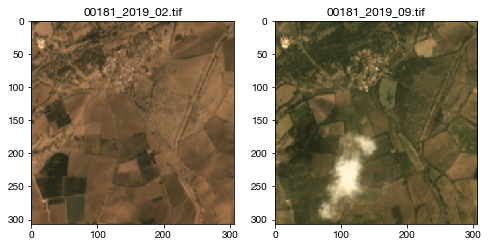

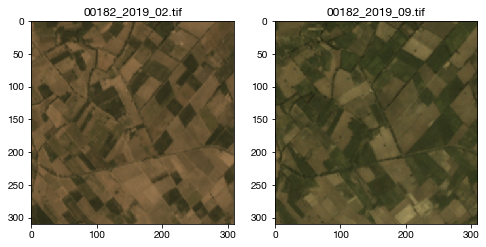

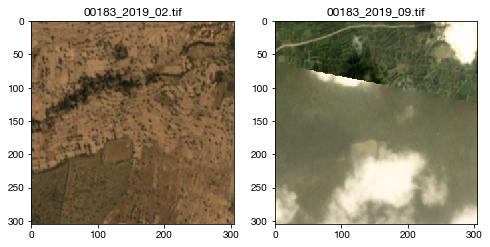

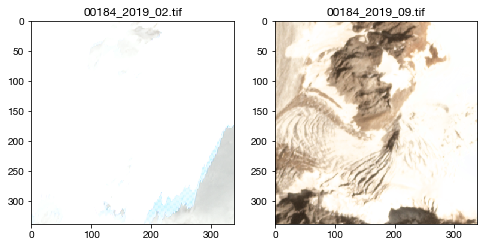

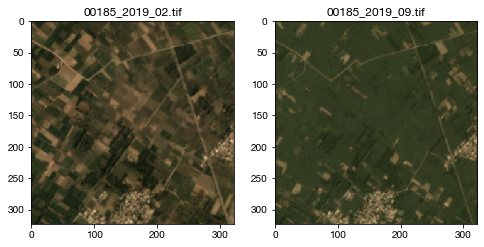

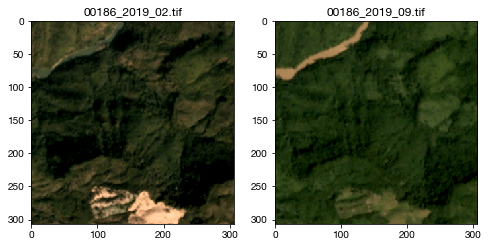

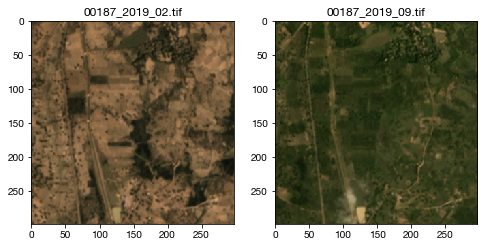

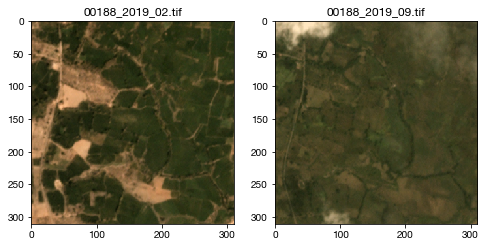

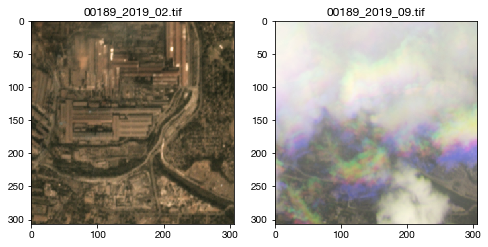

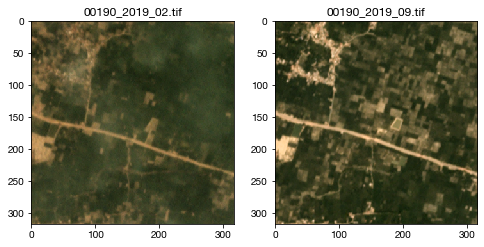

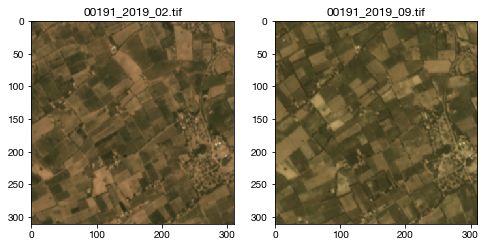

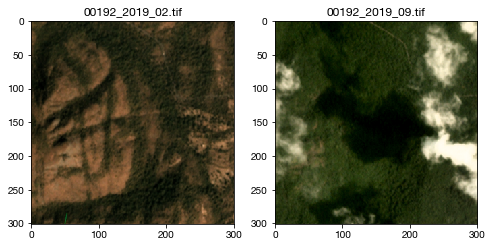

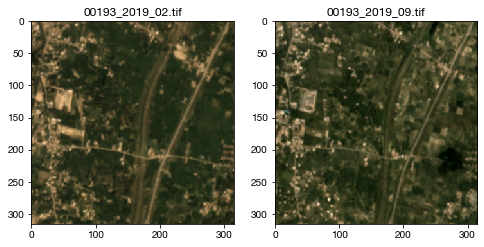

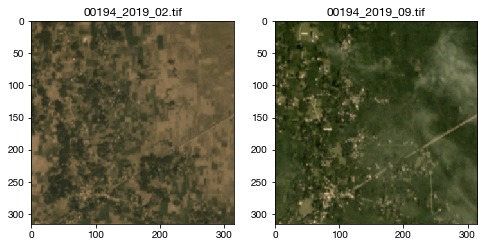

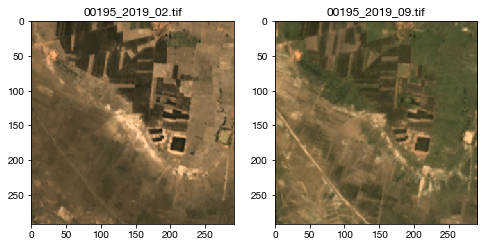

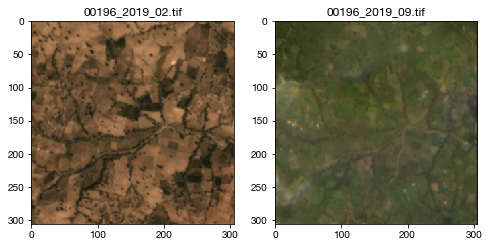

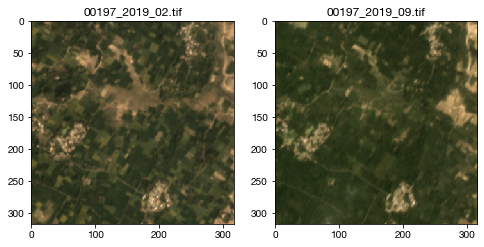

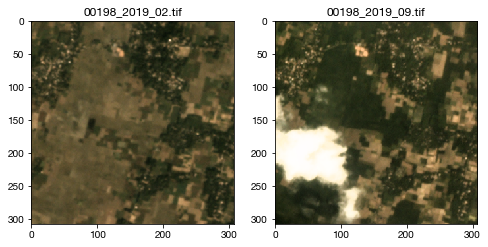

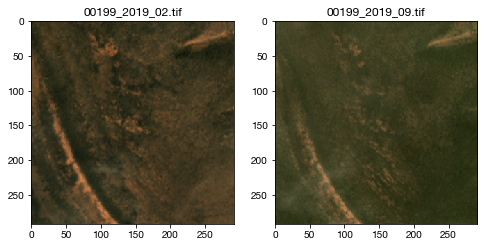

In [172]:
img_dir = '../data/planet/india/monthly_mosaics_renamed_clipped_merged/2019_02/'
img_dir_sep = '../data/planet/india/monthly_mosaics_renamed_clipped_merged/2019_09/'
img_names = os.listdir(img_dir)
img_names = sorted(img_names)

for img_name in img_names[170:200]:
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    img = imageio.imread(os.path.join(img_dir, img_name))
    ax[0].imshow(img)
    ax[0].set_title(img_name)
    
    img_name_sep = img_name.split('_')[0] + '_2019_09.tif'
    img = imageio.imread(os.path.join(img_dir_sep, img_name_sep))
    ax[1].imshow(img)
    ax[1].set_title(img_name_sep)
    
    plt.show()

In [173]:
india_samples = pd.read_csv('../data/planet/india/bbox1000.csv')
india_iscropland = pd.read_csv('../mount/data/planetData/india/india_planet_is_cropland.csv')[
    ['image_id', 'is_cropland']]
# india_iscropland['image_id'] = india_iscropland['image_id'].astype(str).str.zfill(5)

In [174]:
merged = india_samples.merge(india_iscropland, on='image_id', how='inner')
merged['image_id'] = merged['image_id'].astype(str).str.zfill(5)
cropland = merged[merged['is_cropland'] == 1].reset_index(drop=True)
cropland.head()

image_id    min_lon    min_lat    max_lon    max_lat  is_cropland
0    00000  77.290850   9.704133  77.303176   9.716283            1
1    00002  70.750019  25.691702  70.763502  25.703852            1
2    00003  83.431280  18.745315  83.444111  18.757465            1
3    00004  84.124311  23.181774  84.137528  23.193924            1
4    00005  79.051971  25.924440  79.065480  25.936590            1

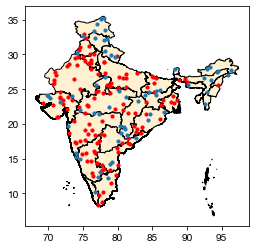

In [177]:
# plot one point at a time
india = geopandas.read_file('../mount/data/gadm36_IND_shp/gadm36_IND_1.shp')
fig, ax = plt.subplots(1, figsize=(4,6))
india.plot(ax=ax, edgecolor='black', color='#fff0d1')
plt.scatter(cropland['min_lon'], cropland['min_lat'], color='red', s=10)
plt.scatter(merged[merged['is_cropland'] == 0]['min_lon'], 
            merged[merged['is_cropland'] == 0]['min_lat'], color='C0', s=10)
# plt.scatter(india_samples.iloc[60:100]['min_lon'],
#             india_samples.iloc[60:100]['min_lat'], color='C2', s=10)
plt.show()

In [181]:
# stratified sampling: sample 1 cropland tile from each state that has at least 1 such tile
which_state = []
for i, row in cropland.iterrows():
    print(i)
    pt = Point(row['min_lon'], row['min_lat'])
    
    for j, row2 in india.iterrows():
        if pt.within(row2['geometry']):
            which_state.append(row2['NAME_1'])

In [185]:
cropland['NAME_1'] = which_state

In [187]:
cropland.groupby('NAME_1').size()

NAME_1
Andhra Pradesh        9
Assam                 1
Bihar                 6
Chhattisgarh          2
Gujarat              12
Haryana               6
Jammu and Kashmir     1
Jharkhand             2
Karnataka            13
Madhya Pradesh       13
Maharashtra          13
Manipur               1
Odisha                7
Punjab                6
Rajasthan            15
Tamil Nadu            6
Telangana             3
Uttar Pradesh        12
Uttarakhand           1
West Bengal           7
dtype: int64

In [199]:
shuffled = cropland.sample(frac=1)
shuffled = shuffled.drop_duplicates('NAME_1')
# to_label = pd.DataFrame(columns=['image_id'])

In [200]:
shuffled.shape

(20, 7)

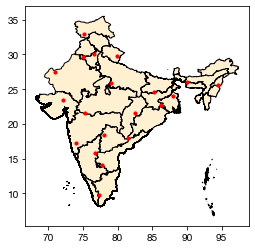

In [201]:
# plot one point at a time
india = geopandas.read_file('../mount/data/gadm36_IND_shp/gadm36_IND_1.shp')
fig, ax = plt.subplots(1, figsize=(4,6))
india.plot(ax=ax, edgecolor='black', color='#fff0d1')
plt.scatter(shuffled['min_lon'], shuffled['min_lat'], color='red', s=10)
# plt.scatter(merged[merged['is_cropland'] == 0]['min_lon'], 
#             merged[merged['is_cropland'] == 0]['min_lat'], color='C0', s=10)
plt.show()

In [207]:
not_sampled = merged[~merged['image_id'].isin(shuffled['image_id'].values)].reset_index(drop=True)

In [227]:
sample2 = not_sampled.sample(10)
full_sample = pd.concat([shuffled, sample2], sort=False).reset_index(drop=True)

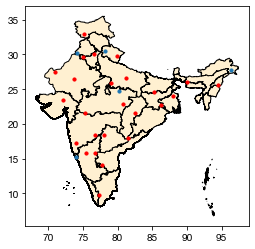

In [228]:
# plot one point at a time
india = geopandas.read_file('../mount/data/gadm36_IND_shp/gadm36_IND_1.shp')
fig, ax = plt.subplots(1, figsize=(4,6))
india.plot(ax=ax, edgecolor='black', color='#fff0d1')
plt.scatter(full_sample[full_sample['is_cropland'] == 1]['min_lon'], 
            full_sample[full_sample['is_cropland'] == 1]['min_lat'], color='red', s=10)
plt.scatter(full_sample[full_sample['is_cropland'] == 0]['min_lon'], 
            full_sample[full_sample['is_cropland'] == 0]['min_lat'], color='C0', s=10)
plt.show()

In [230]:
which_state = []
for i, row in full_sample.iterrows():
    print(i)
    pt = Point(row['min_lon'], row['min_lat'])
    
    for j, row2 in india.iterrows():
        if pt.within(row2['geometry']):
            which_state.append(row2['NAME_1'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [231]:
full_sample['NAME_1'] = which_state
full_sample

image_id    min_lon    min_lat    max_lon    max_lat  is_cropland  \
0     00121  72.142277  23.420090  72.155518  23.432240            1   
1     00158  75.256107  21.570021  75.269172  21.582171            1   
2     00064  74.058306  17.173627  74.071023  17.185777            1   
3     00126  76.528508  30.089871  76.542550  30.102021            1   
4     00093  87.949213  24.040718  87.962517  24.052868            1   
5     00005  79.051971  25.924440  79.065480  25.936590            1   
6     00073  85.188673  24.536942  85.202029  24.549092            1   
7     00107  77.779906  14.084677  77.792433  14.096827            1   
8     00075  75.080762  29.580826  75.094733  29.592976            1   
9     00009  71.033341  27.483925  71.047036  27.496075            1   
10    00178  76.729277  15.746177  76.741901  15.758327            1   
11    00187  81.561032  17.908209  81.573801  17.920359            1   
12    00189  86.203603  22.777058  86.216781  22.789208            1   
13    00000  77.290850   9.704133  77.303176   9.716283            1   
14    00101  75.136074  32.911163  75.150547  32.923313            1   
15    00111  79.884572  29.735636  79.898564  29.747786            1   
16    00057  89.977981  25.982643  89.991497  25.994793            1   
17    00062  77.986057  18.332411  77.998857  18.344561            1   
18    00183  82.483610  21.620492  82.496680  21.632642            1   
19    00108  94.523063  25.635317  94.536540  25.647467            1   
20    00116  76.713834  18.353607  76.726635  18.365757            1   
21    00146  96.383177  27.708512  96.396901  27.720662            0   
22    00020  74.192309  30.154350  74.206360  30.166500            0   
23    00106  73.726860  26.412006  73.740426  26.424156            1   
24    00104  78.214133  30.518804  78.228237  30.530954            0   
25    00180  75.375444  15.740028  75.388067  15.752178            1   
26    00197  81.273003  26.631925  81.286596  26.644075            1   
27    00139  80.269652  24.797031  80.283036  24.809181            0   
28    00117  80.808333  22.807709  80.821513  22.819859            1   
29    00018  73.943969  15.275324  73.956564  15.287474            0   

               NAME_1  
0             Gujarat  
1      Madhya Pradesh  
2         Maharashtra  
3              Punjab  
4         West Bengal  
5       Uttar Pradesh  
6               Bihar  
7      Andhra Pradesh  
8             Haryana  
9           Rajasthan  
10          Karnataka  
11             Odisha  
12          Jharkhand  
13         Tamil Nadu  
14  Jammu and Kashmir  
15        Uttarakhand  
16              Assam  
17          Telangana  
18       Chhattisgarh  
19            Manipur  
20        Maharashtra  
21  Arunachal Pradesh  
22             Punjab  
23          Rajasthan  
24        Uttarakhand  
25          Karnataka  
26      Uttar Pradesh  
27     Madhya Pradesh  
28     Madhya Pradesh  
29                Goa

In [250]:
boxes = []
for i, row in full_sample.iterrows():
    boxes.append(box(row['min_lon'], row['min_lat'], row['max_lon'], row['max_lat']))

In [252]:
full_sample['geometry'] = boxes

In [257]:
geo_df = geopandas.GeoDataFrame(full_sample, geometry='geometry')[['image_id', 'is_cropland', 'NAME_1', 'geometry']]
geo_df[['image_id', 'NAME_1', 'is_cropland', 'geometry']].to_file(
    '../data/planet/india/images_to_label_first30.shp')

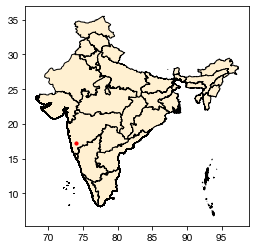

In [259]:
# plot one point at a time
india = geopandas.read_file('../mount/data/gadm36_IND_shp/gadm36_IND_1.shp')
fig, ax = plt.subplots(1, figsize=(4,6))
india.plot(ax=ax, edgecolor='black', color='#fff0d1')
plt.scatter(full_sample[full_sample['image_id'] == '00064']['min_lon'], 
            full_sample[full_sample['image_id'] == '00064']['min_lat'], color='red', s=10)
plt.show()